In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from convolution.conv_3d import Conv3D
from pooling.maxpool_3d import MaxPooling3D

from layers.layer_dense import Layer_Dense
from activation_func.relu import Activation_ReLU
from loss.activation_softmax_loss_categorical_crossentropy import Activation_Softmax_Loss_CategoricalCrossentropy
from optimizers.adam import Optimizer_Adam 
from model.model import Model
from layers.flatten import Flatten
from activation_func.softmax import Activation_Softmax
from loss.categorical_cross_entropy import Loss_CategoricalCrossentropy
from accuracy.accuracy_categorical import Accuracy_Categorical

In [2]:
#load datasets
test_csv_path='mnist/mnist/test.csv'
train_csv_path='mnist/mnist/train.csv'

In [3]:
#load the dataset
train_data=pd.read_csv(train_csv_path)
test_data=pd.read_csv(test_csv_path)

In [4]:
#split the dataset and normalize 
y_train = train_data['label'].values
x_train = train_data.drop(columns=['label']).values/255
X_test = test_data.values/255

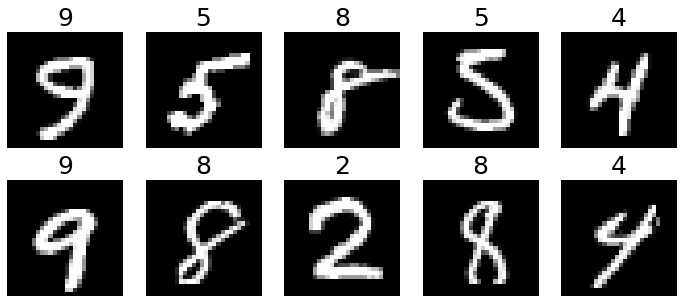

In [5]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,42000,size=10)
for i in range(10):
    axes[i].imshow(x_train[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_train[idx[i]])), color= 'black', fontsize=25)
plt.show()

The idea here is to try to implement LeNet(5) implementation but instead of using avr-pooling and sigmoid we gonna try to work with Relu and max pooling with softmax      

In [6]:
#reshape x_train to be of shape [N,28,28,1] || train,val data
x_train=x_train.reshape(x_train.shape[0],28,28)
x_train=np.expand_dims(x_train,axis=3)

x_test=X_test.reshape(X_test.shape[0],28,28)
x_test=np.expand_dims(x_test,axis=3)

In [7]:
#define the model and layers 
model = Model()
model.add(Conv3D([5,5,1,6],6,padding=1,stride=1))
model.add(Activation_ReLU())
model.add(MaxPooling3D(f=2,stride=2))
model.add(Conv3D([5,5,6,16],16,padding=1,stride=1))
model.add(MaxPooling3D(f=2,stride=2))
model.add(Activation_ReLU())
model.add(Flatten())
model.add(Layer_Dense(400,200))
model.add(Activation_ReLU())
model.add(Layer_Dense(200,10))
model.add(Activation_Softmax())


In [8]:
#set loss,optimizer and accuracy 
model.set(
loss=Loss_CategoricalCrossentropy(),
optimizer=Optimizer_Adam(decay=5e-5),
accuracy=Accuracy_Categorical()
)

In [9]:
#finalize the model
model.finalize()

In [ ]:
model.train(x_train,y_train,epochs=1,batch_size=32,print_every=10)